In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [157]:
with open('results.pickle', 'rb') as f:
    results = pickle.load(f)

In [158]:
for i in range(len(results)):
    for j in range(len(results[i])):
        results[i][j]['n_rules'] = i + 1

In [159]:
results_ = []
for i in range(len(results)):
    results_.extend(results[i])

In [160]:
df = pd.DataFrame(results_)

In [161]:
df.head()

,True Positives,True Negatives,False Positives,False Negatives,Accuracy,Positive predictive value (Precision),True positive rate (Recall),False positive rate (FPR),False negative rate (FNR),True negative rate (Specificity),F1 score,n_rules
0,6307,2797,3703,1193,0.650286,0.630070,0.840933,0.569692,0.159067,0.430308,0.720388,1
1,6108,4402,2098,1392,0.750714,0.744333,0.814400,0.322769,0.185600,0.677231,0.777792,1
2,1456,6283,217,6044,0.552786,0.870293,0.194133,0.033385,0.805867,0.966615,0.317453,1
3,2891,6500,0,4609,0.670786,1.000000,0.385467,0.000000,0.614533,1.000000,0.556443,1
4,7477,500,6000,23,0.569786,0.554797,0.996933,0.923077,0.003067,0.076923,0.712876,1


In [162]:
accuracies = [[sample['Accuracy'] for sample in result] for result in results]
fpr = [[sample['False positive rate (FPR)'] for sample in result] for result in results]
fnr = [[sample['False negative rate (FNR)'] for sample in result] for result in results]

In [241]:
np(accuracies[0])

0.8287142857142857

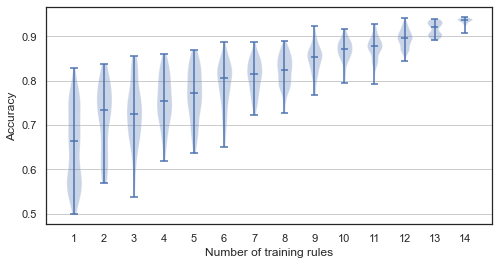

In [195]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# generate some random test data
all_data = accuracies

#plot violin plot
ax.violinplot(all_data,
                  showmeans=False,
                  showmedians=True)

# ax = sns.violinplot(x="n_rules", y="Accuracy", data=df,
#                     #palette="Set2",
#                     scale="count",
#                     inner="quartile",
#                     cut=0)

ax.yaxis.grid(True)
ax.set_xticks([y + 1 for y in range(len(all_data))])
ax.set_xlabel('Number of training rules')
ax.set_ylabel('Accuracy')

# add x-tick labels
plt.setp(ax, xticks=[y + 1 for y in range(len(all_data))])
plt.savefig('accuracy.png',dpi=600,bbox_inches='tight')
plt.show()

C:\Users\Usuario\.conda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\Usuario\.conda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\Users\Usuario\.conda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\Usuario\.conda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases late

C:\Users\Usuario\.conda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


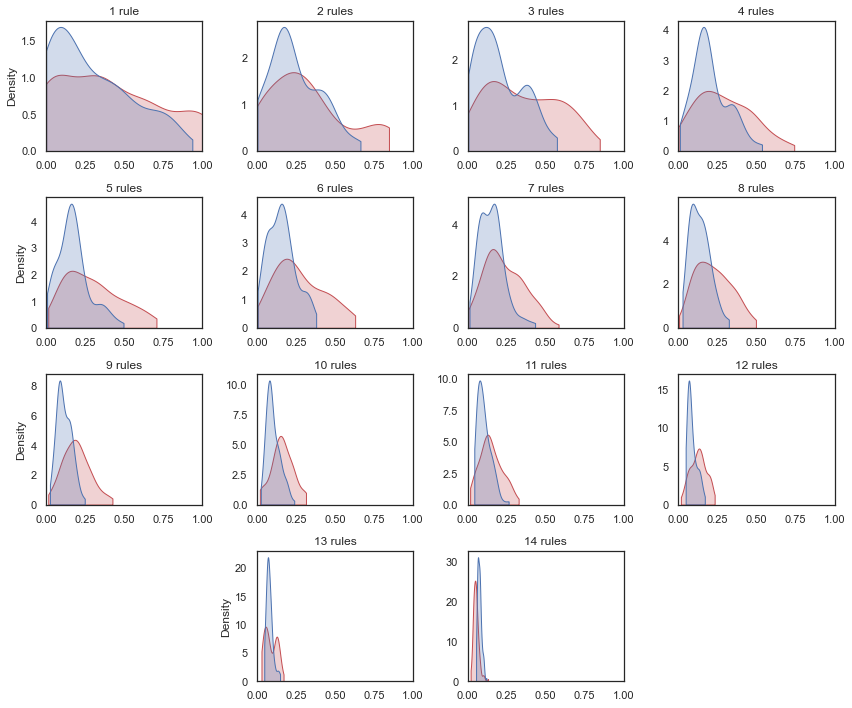

In [240]:
fig, axs = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=False, figsize=(12, 10))
# plt.subplots_adjust(wspace=0.3, hspace=0.2)

nr = 1
for i in range(3):
    for j in range(4):
        if (nr<=14):
            axs[i,j].set_xlim([0, 1])
            axs[i,j].set_title(str(nr) + (' rule' if nr==1 else ' rules'))
            sns.kdeplot(df.loc[(df['n_rules']==nr), 'False positive rate (FPR)'], bw_adjust=1, cut=0, common_norm = True,
                        color='r', shade=True, Label='FPR', ax=axs[i,j]) 

            sns.kdeplot(df.loc[(df['n_rules']==nr), 'False negative rate (FNR)'], bw_adjust=1, cut=0, common_norm = True,
                        color='b', shade=True, Label='FNR', ax=axs[i,j]) 
            axs[i,j].set_xlabel('')
            if j != 0:
                axs[i,j].set_ylabel('')
            nr += 1
        else:
            axs[i,j].set_frame_on(False)
            axs[i,j].set_axis_off()
            
axs[2,0].set_xticks(axs[3,0].get_xticks())
            
axs[3,0].set_frame_on(False)
axs[3,0].set_axis_off()
axs[3,3].set_frame_on(False)
axs[3,3].set_axis_off()

axs[3,1].set_xlim([0, 1])
axs[3,1].set_title(str(nr) + (' rule' if nr==1 else ' rules'))
sns.kdeplot(df.loc[(df['n_rules']==nr), 'False positive rate (FPR)'], bw_adjust=1, cut=0, common_norm = True,
            color='r', shade=True, Label='FPR', ax=axs[3,1]) 

sns.kdeplot(df.loc[(df['n_rules']==nr), 'False negative rate (FNR)'], bw_adjust=1, cut=0, common_norm = True,
            color='b', shade=True, Label='FNR', ax=axs[3,1]) 
axs[3,1].set_xlabel('')

nr+=1
axs[3,2].set_xlim([0, 1])
axs[3,2].set_title(str(nr) + (' rule' if nr==1 else ' rules'))
sns.kdeplot(df.loc[(df['n_rules']==nr), 'False positive rate (FPR)'], bw_adjust=1, cut=0, common_norm = True,
            color='r', shade=True, Label='FPR', ax=axs[3,2]) 

sns.kdeplot(df.loc[(df['n_rules']==nr), 'False negative rate (FNR)'], bw_adjust=1, cut=0, common_norm = True,
            color='b', shade=True, Label='FNR', ax=axs[3,2]) 
axs[3,2].set_xlabel('')
axs[3,2].set_ylabel('')
            
         
plt.tight_layout()
plt.savefig('fpr_fnr.png',dpi=600,bbox_inches='tight')
plt.show()

In [166]:
ddD

0.042

0.074

In [181]:
df2 = df.copy()
df2 = df2[['n_rules', 'False positive rate (FPR)']]
df2['fpr'] = 'FPR'
df2.columns = ['n_rules', 'value', 'fpr']
df3 = df.copy()
df3 = df3[['n_rules', 'False negative rate (FNR)']]
df3['fpr'] = 'FNR'
df3.columns = ['n_rules', 'value', 'fpr']

In [182]:
df4 = pd.concat([df2, df3])

In [183]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 1399
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   n_rules  2800 non-null   int64  
 1   value    2800 non-null   float64
 2   fpr      2800 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 87.5+ KB


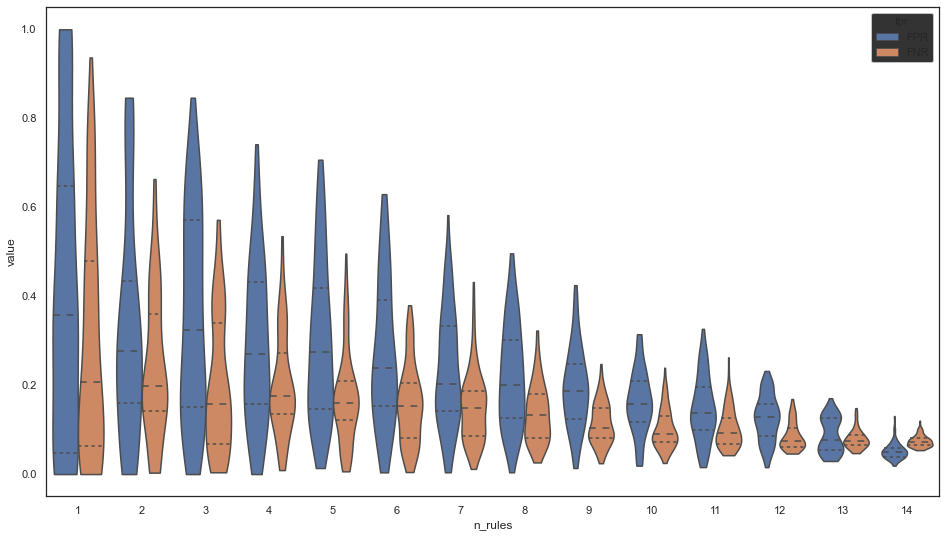

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

# ax = sns.violinplot(x="n_rules", y="value", hue="fpr", data=df4, 
#                     palette="muted",
#                     split=True)
ax = sns.violinplot(x="n_rules", y="value", hue="fpr", data=df4,
                    #palette="Set2",
                    split=False,
                    scale="count",
                    inner="quartile",
                    cut=0)
#plt.savefig('pfr_fnr.png',dpi=600,bbox_inches='tight')
plt.show()